# Midterm project. Flight price prediction - regression model 
### BDA 2208 - Abdykarimov Amir, Yernazar Yermuratov, Damenova Dana 


First, we import the dataset. We chose clean_dataset because it had features that wasn't present in 'business' and 'economy'.

In [1]:
import pandas as pd

data = pd.read_csv('Clean_Dataset.csv')

data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Data cleaning
We removed indexes and flight since flight had values that vary too much 

In [2]:
data.drop(['Unnamed: 0', 'flight'], axis=1, inplace=True)
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Data transformation & feature engineering
Transforming categorical values into numerical using one-hot encoding or other labeling methods (for columns 'stops, 'class'). We can't implement feature selection just yet, because not all of our data is represented numerically

In [3]:
data['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [4]:
data['stops'] = data['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})
data.head(5)

C:\Users\Админ\AppData\Local\Temp\ipykernel_11300\1485526674.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['stops'] = data['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
data['class'] = data['class'].replace({'Economy': 0, 'Business': 1})
data.head(5)

C:\Users\Админ\AppData\Local\Temp\ipykernel_11300\2187003661.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['class'] = data['class'].replace({'Economy': 0, 'Business': 1})


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


 Now we move on to adding new variables based on hot-one encoding method for airlines, arrival and departure time

In [6]:
data['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [7]:
data['arr_Night'] = (data['arrival_time'] == 'Night').astype(int)
data['arr_Morning'] = (data['arrival_time'] == 'Morning').astype(int)
data['arr_Early_Morning'] = (data['arrival_time'] == 'Early_Morning').astype(int)
data['arr_Afternoon'] = (data['arrival_time'] == 'Afternoon').astype(int)
data['arr_Evening'] = (data['arrival_time'] == 'Evening').astype(int)
data['arr_Late_Night'] = (data['arrival_time'] == 'Late_Night').astype(int)

In [8]:
data.drop(['arrival_time'], axis=1, inplace=True)
data.head(5)

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left,price,arr_Night,arr_Morning,arr_Early_Morning,arr_Afternoon,arr_Evening,arr_Late_Night
0,SpiceJet,Delhi,Evening,0,Mumbai,0,2.17,1,5953,1,0,0,0,0,0
1,SpiceJet,Delhi,Early_Morning,0,Mumbai,0,2.33,1,5953,0,1,0,0,0,0
2,AirAsia,Delhi,Early_Morning,0,Mumbai,0,2.17,1,5956,0,0,1,0,0,0
3,Vistara,Delhi,Morning,0,Mumbai,0,2.25,1,5955,0,0,0,1,0,0
4,Vistara,Delhi,Morning,0,Mumbai,0,2.33,1,5955,0,1,0,0,0,0


In [9]:
data['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [10]:
data['dep_Night'] = (data['departure_time'] == 'Night').astype(int)
data['dep_Morning'] = (data['departure_time'] == 'Morning').astype(int)
data['dep_Early_Morning'] = (data['departure_time'] == 'Early_Morning').astype(int)
data['dep_Afternoon'] = (data['departure_time'] == 'Afternoon').astype(int)
data['dep_Evening'] = (data['departure_time'] == 'Evening').astype(int)
data['dep_Late_Night'] = (data['departure_time'] == 'Late_Night').astype(int)

In [11]:
data.drop(['departure_time'], axis=1, inplace=True)
data.head(5)

,airline,source_city,stops,destination_city,class,duration,days_left,price,arr_Night,arr_Morning,arr_Early_Morning,arr_Afternoon,arr_Evening,arr_Late_Night,dep_Night,dep_Morning,dep_Early_Morning,dep_Afternoon,dep_Evening,dep_Late_Night
0,SpiceJet,Delhi,0,Mumbai,0,2.17,1,5953,1,0,0,0,0,0,0,0,0,0,1,0
1,SpiceJet,Delhi,0,Mumbai,0,2.33,1,5953,0,1,0,0,0,0,0,0,1,0,0,0
2,AirAsia,Delhi,0,Mumbai,0,2.17,1,5956,0,0,1,0,0,0,0,0,1,0,0,0
3,Vistara,Delhi,0,Mumbai,0,2.25,1,5955,0,0,0,1,0,0,0,1,0,0,0,0
4,Vistara,Delhi,0,Mumbai,0,2.33,1,5955,0,1,0,0,0,0,0,1,0,0,0,0


In [12]:
data['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [13]:
direction = data['source_city']+'_to_'+ data['destination_city']
direction = pd.get_dummies(direction)
direction.head(5)

,Bangalore_to_Chennai,Bangalore_to_Delhi,Bangalore_to_Hyderabad,Bangalore_to_Kolkata,Bangalore_to_Mumbai,Chennai_to_Bangalore,Chennai_to_Delhi,Chennai_to_Hyderabad,Chennai_to_Kolkata,Chennai_to_Mumbai,...,Kolkata_to_Bangalore,Kolkata_to_Chennai,Kolkata_to_Delhi,Kolkata_to_Hyderabad,Kolkata_to_Mumbai,Mumbai_to_Bangalore,Mumbai_to_Chennai,Mumbai_to_Delhi,Mumbai_to_Hyderabad,Mumbai_to_Kolkata
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
airline = pd.get_dummies(data['airline'])
airline.head(5)

,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True


Now we unite created dataframes and drop text features

In [15]:
data = pd.concat([data, direction, airline],axis=1)
data.head(5)

,airline,source_city,stops,destination_city,class,duration,days_left,price,arr_Night,arr_Morning,...,Mumbai_to_Chennai,Mumbai_to_Delhi,Mumbai_to_Hyderabad,Mumbai_to_Kolkata,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,SpiceJet,Delhi,0,Mumbai,0,2.17,1,5953,1,0,...,False,False,False,False,False,False,False,False,True,False
1,SpiceJet,Delhi,0,Mumbai,0,2.33,1,5953,0,1,...,False,False,False,False,False,False,False,False,True,False
2,AirAsia,Delhi,0,Mumbai,0,2.17,1,5956,0,0,...,False,False,False,False,True,False,False,False,False,False
3,Vistara,Delhi,0,Mumbai,0,2.25,1,5955,0,0,...,False,False,False,False,False,False,False,False,False,True
4,Vistara,Delhi,0,Mumbai,0,2.33,1,5955,0,1,...,False,False,False,False,False,False,False,False,False,True


In [16]:
data.drop(['airline'], axis=1, inplace = True)
data.drop(['source_city'], axis=1, inplace = True)
data.drop(['destination_city'], axis=1, inplace = True)

#### The resulting dataframe that we will be working with

In [17]:
data.head()

,stops,class,duration,days_left,price,arr_Night,arr_Morning,arr_Early_Morning,arr_Afternoon,arr_Evening,...,Mumbai_to_Chennai,Mumbai_to_Delhi,Mumbai_to_Hyderabad,Mumbai_to_Kolkata,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,0,0,2.17,1,5953,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,0,2.33,1,5953,0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,2.17,1,5956,0,0,1,0,0,...,False,False,False,False,True,False,False,False,False,False
3,0,0,2.25,1,5955,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
4,0,0,2.33,1,5955,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True


## Feature selection
Let's see what columns do we have

In [18]:
data.columns

Index(['stops', 'class', 'duration', 'days_left', 'price', 'arr_Night',
       'arr_Morning', 'arr_Early_Morning', 'arr_Afternoon', 'arr_Evening',
       'arr_Late_Night', 'dep_Night', 'dep_Morning', 'dep_Early_Morning',
       'dep_Afternoon', 'dep_Evening', 'dep_Late_Night',
       'Bangalore_to_Chennai', 'Bangalore_to_Delhi', 'Bangalore_to_Hyderabad',
       'Bangalore_to_Kolkata', 'Bangalore_to_Mumbai', 'Chennai_to_Bangalore',
       'Chennai_to_Delhi', 'Chennai_to_Hyderabad', 'Chennai_to_Kolkata',
       'Chennai_to_Mumbai', 'Delhi_to_Bangalore', 'Delhi_to_Chennai',
       'Delhi_to_Hyderabad', 'Delhi_to_Kolkata', 'Delhi_to_Mumbai',
       'Hyderabad_to_Bangalore', 'Hyderabad_to_Chennai', 'Hyderabad_to_Delhi',
       'Hyderabad_to_Kolkata', 'Hyderabad_to_Mumbai', 'Kolkata_to_Bangalore',
       'Kolkata_to_Chennai', 'Kolkata_to_Delhi', 'Kolkata_to_Hyderabad',
       'Kolkata_to_Mumbai', 'Mumbai_to_Bangalore', 'Mumbai_to_Chennai',
       'Mumbai_to_Delhi', 'Mumbai_to_Hyderabad', 'Mu

#### Let's see what will we get if we select random variables

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data[['stops',  'duration', 'days_left', 'arr_Night',
       'arr_Morning', 'arr_Early_Morning', 'arr_Afternoon', 'Kolkata_to_Hyderabad',
       'Kolkata_to_Mumbai', 'Mumbai_to_Bangalore',
       'AirAsia', ]]  # Features
y = data['price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 480337426.98053944


#### The error is 480 millions (~22 000 - average error). What happens if we try including every single column except for 'price'? 

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data[['stops', 'class', 'duration', 'days_left', 'arr_Night',
       'arr_Morning', 'arr_Early_Morning', 'arr_Afternoon', 'arr_Evening',
       'arr_Late_Night', 'dep_Night', 'dep_Morning', 'dep_Early_Morning',
       'dep_Afternoon', 'dep_Evening', 'dep_Late_Night',
       'Bangalore_to_Chennai', 'Bangalore_to_Delhi', 'Bangalore_to_Hyderabad',
       'Bangalore_to_Kolkata', 'Bangalore_to_Mumbai', 'Chennai_to_Bangalore',
       'Chennai_to_Delhi', 'Chennai_to_Hyderabad', 'Chennai_to_Kolkata',
       'Chennai_to_Mumbai', 'Delhi_to_Bangalore', 'Delhi_to_Chennai',
       'Delhi_to_Hyderabad', 'Delhi_to_Kolkata', 'Delhi_to_Mumbai',
       'Hyderabad_to_Bangalore', 'Hyderabad_to_Chennai', 'Hyderabad_to_Delhi',
       'Hyderabad_to_Kolkata', 'Hyderabad_to_Mumbai', 'Kolkata_to_Bangalore',
       'Kolkata_to_Chennai', 'Kolkata_to_Delhi', 'Kolkata_to_Hyderabad',
       'Kolkata_to_Mumbai', 'Mumbai_to_Bangalore', 'Mumbai_to_Chennai',
       'Mumbai_to_Delhi', 'Mumbai_to_Hyderabad', 'Mumbai_to_Kolkata',
       'AirAsia', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara']]  # Features
y = data['price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 46666743.64230618


#### The error decreased and now constitutes 48 millions. Next step is attempting to apply feature selection algorithm (Random forest regressor). Attempting to choose 11 variables out of 53.

In [33]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1, random_state=40)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

sorted_indices = feature_importances.argsort()[::-1]
top_k_indices = sorted_indices[:15]
selected_features = X_train.columns[top_k_indices]
print("Top 15 Features:", selected_features)

Top 15 Features: Index(['class', 'duration', 'days*days', 'Air_India', 'days_left',
       'arr_Evening', 'arr_Night', 'Delhi_to_Kolkata', 'Mumbai_to_Bangalore',
       'Bangalore_to_Mumbai', 'Kolkata_to_Delhi', 'stops', 'Mumbai_to_Kolkata',
       'Kolkata_to_Mumbai', 'dep_Evening'],
      dtype='object')


In [22]:
X = data[['class', 'duration', 'days_left', 'Air_India', 'Vistara',
       'Delhi_to_Kolkata', 'Mumbai_to_Bangalore', 'Bangalore_to_Mumbai',
       'stops', 'Kolkata_to_Delhi', 'arr_Evening', 'arr_Night',
       'Kolkata_to_Mumbai', 'Mumbai_to_Kolkata', 'dep_Evening']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 48336306.640076265


#### As we see, there's a slight improvement. Now, let's see what happens if we get rid of the outliers

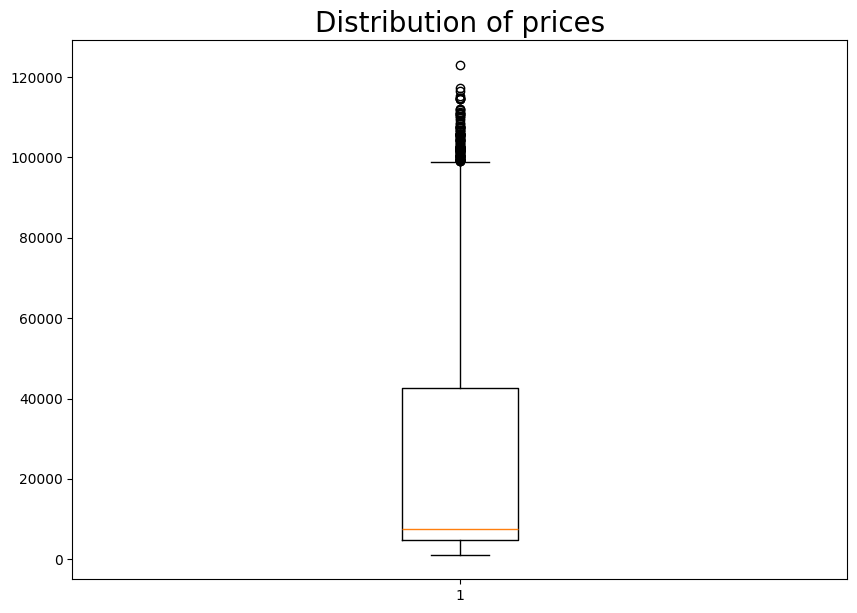

7425


In [23]:
import matplotlib.pyplot as plt
import numpy as np
import statistics
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(data['price'])
 
plt.title('Distribution of prices', fontsize=20)

plt.show()
print(statistics.median(data['price']))

In [24]:
Q1 = np.percentile(data['price'], 25, method='midpoint')
Q3 = np.percentile(data['price'], 75, method='midpoint')
IQR = Q3 - Q1

upper = Q3+1.5*IQR
upper_array = np.array(data['price'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())
 
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(data['price']<= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 99128.0
123
Lower Bound: -51824.0
0


In [25]:
upper_array = np.where(data['price'] >= upper)[0]
lower_array = np.where(data['price'] <= lower)[0]

data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)

#### We removed 123 values that had price exceeding 99 thousands. Let's see MSE with the 11 features that we've selected previously

In [26]:
X = data[['class', 'duration', 'days_left', 'Air_India', 'Vistara',
       'Delhi_to_Kolkata', 'Mumbai_to_Bangalore', 'Bangalore_to_Mumbai',
       'stops', 'Kolkata_to_Delhi', 'arr_Evening', 'arr_Night',
       'Kolkata_to_Mumbai', 'Mumbai_to_Kolkata', 'dep_Evening']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 46573307.10135689


As we can see, we reduced MSE by another 2 millions. Now we will attempt to see whether there are features that aren't linearly dependent by plotting graphs (with those variables that have values other than 1 and 0)

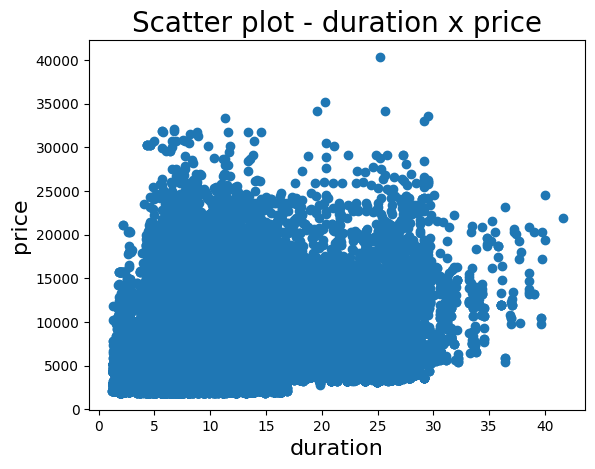

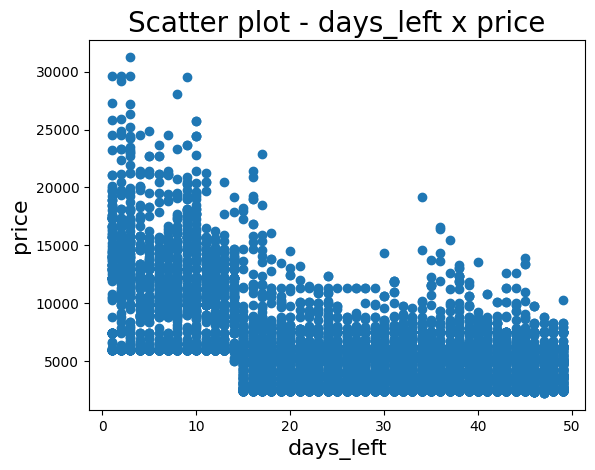

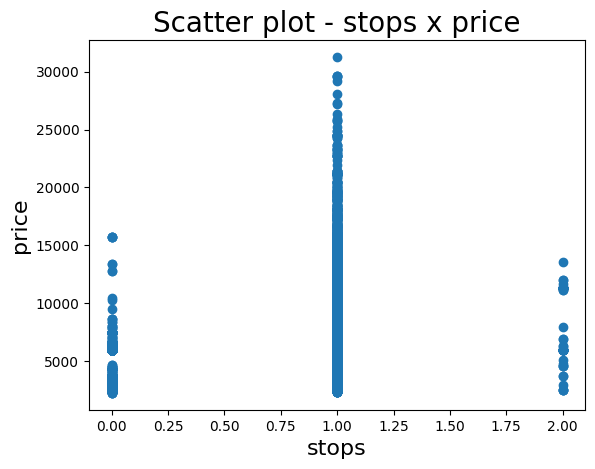

In [27]:
import numpy
import matplotlib.pyplot as plt

x = data[1:100000]['duration']
y = data[1:100000]['price']

plt.xlabel('duration', fontsize=16)
plt.ylabel('price', fontsize=16)
plt.title('Scatter plot - duration x price', fontsize=20)

plt.scatter(x, y)
plt.show()

x = data[1:10000]['days_left']
y = data[1:10000]['price']


plt.xlabel('days_left', fontsize=16)
plt.ylabel('price', fontsize=16)
plt.title('Scatter plot - days_left x price', fontsize=20)

plt.scatter(x, y)
plt.show()

x = data[1:10000]['stops']
y = data[1:10000]['price']


plt.xlabel('stops', fontsize=16)
plt.ylabel('price', fontsize=16)
plt.title('Scatter plot - stops x price', fontsize=20)


plt.scatter(x, y)
plt.show()

We can see that days_left slightly resembles parabola - let's try adding squared days and see if there's improvement

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data['days*days'] = data['days_left'] * data['days_left']

X = data[['class', 'duration', 'days_left','days*days','Air_India', 'Vistara',
       'Delhi_to_Kolkata', 'Mumbai_to_Bangalore', 'Bangalore_to_Mumbai',
       'stops', 'Kolkata_to_Delhi', 'arr_Evening', 'arr_Night',
       'Kolkata_to_Mumbai', 'Mumbai_to_Kolkata', 'dep_Evening']]  # Features
y = data['price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 45484076.29843607


#### Indeed, there's an improvement by another million. Now we'll perform normalization. It's not supposed to change MSE but it is useful for putting values on the same scale if needed

In [32]:
from sklearn.preprocessing import MinMaxScaler
X = data[['class', 'duration','days*days','days_left', 'Air_India', 'Vistara',
       'Delhi_to_Kolkata', 'Mumbai_to_Bangalore', 'Bangalore_to_Mumbai',
       'stops', 'Kolkata_to_Delhi', 'arr_Evening', 'arr_Night',
       'Kolkata_to_Mumbai', 'Mumbai_to_Kolkata', 'dep_Evening']]  # Features
y = data['price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
mse = mean_squared_error(y_test, y_pred)
print(X_train_norm)
print(mse)

[[1.         0.29428571 0.10625    ... 0.         1.         0.        ]
 [0.         0.16163265 0.26       ... 0.         0.         1.        ]
 [1.         0.51714286 0.22       ... 0.         0.         1.        ]
 ...
 [0.         0.22959184 0.00125    ... 0.         0.         0.        ]
 [0.         0.36571429 0.66625    ... 0.         0.         1.        ]
 [1.         0.20244898 0.73458333 ... 0.         0.         0.        ]]
45484076.29843608


### Cross-Validation

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = data[['class', 'duration', 'days*days','days_left', 'Air_India', 'Vistara',
       'Delhi_to_Kolkata', 'Mumbai_to_Bangalore', 'Bangalore_to_Mumbai',
       'stops', 'Kolkata_to_Delhi', 'arr_Evening', 'arr_Night',
       'Kolkata_to_Mumbai', 'Mumbai_to_Kolkata', 'dep_Evening']]  # Features
y = data['price']  
kf = KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=kf)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Cross-validation scores: [-0.42161524 -0.58127601 -0.21113405  0.84755106  0.05669832]
Mean cross-validation score: -0.061955184251325936


In [31]:
X = data[['class', 'duration','days*days' ,'days_left', 'Air_India', 'Vistara',
       'Delhi_to_Kolkata', 'Mumbai_to_Bangalore', 'Bangalore_to_Mumbai',
       'stops', 'Kolkata_to_Delhi', 'arr_Evening', 'arr_Night',
       'Kolkata_to_Mumbai', 'Mumbai_to_Kolkata', 'dep_Evening']]  # Features
y = data['price']  
k = 5

model = LinearRegression()

neg_mse_scores = cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')
mse_scores = -neg_mse_scores
for i, mse in enumerate(mse_scores):
    print(f"MSE for fold {i+1}: {mse}")

average_mse = np.mean(mse_scores)
print("Common Mean Squared Error:", average_mse)

MSE for fold 1: 19177873.479327213
MSE for fold 2: 21519121.968977273
MSE for fold 3: 16026077.066925267
MSE for fold 4: 88923175.85072961
MSE for fold 5: 138766908.68610713
Common Mean Squared Error: 56882631.4104133


Overall, we managed to reduce MSE from 480 million to 45.5 millions (using the same random_seed). Overall, mean squared error calculated using cross validation constitutes 56.9 millions (RMSE is 7542)  